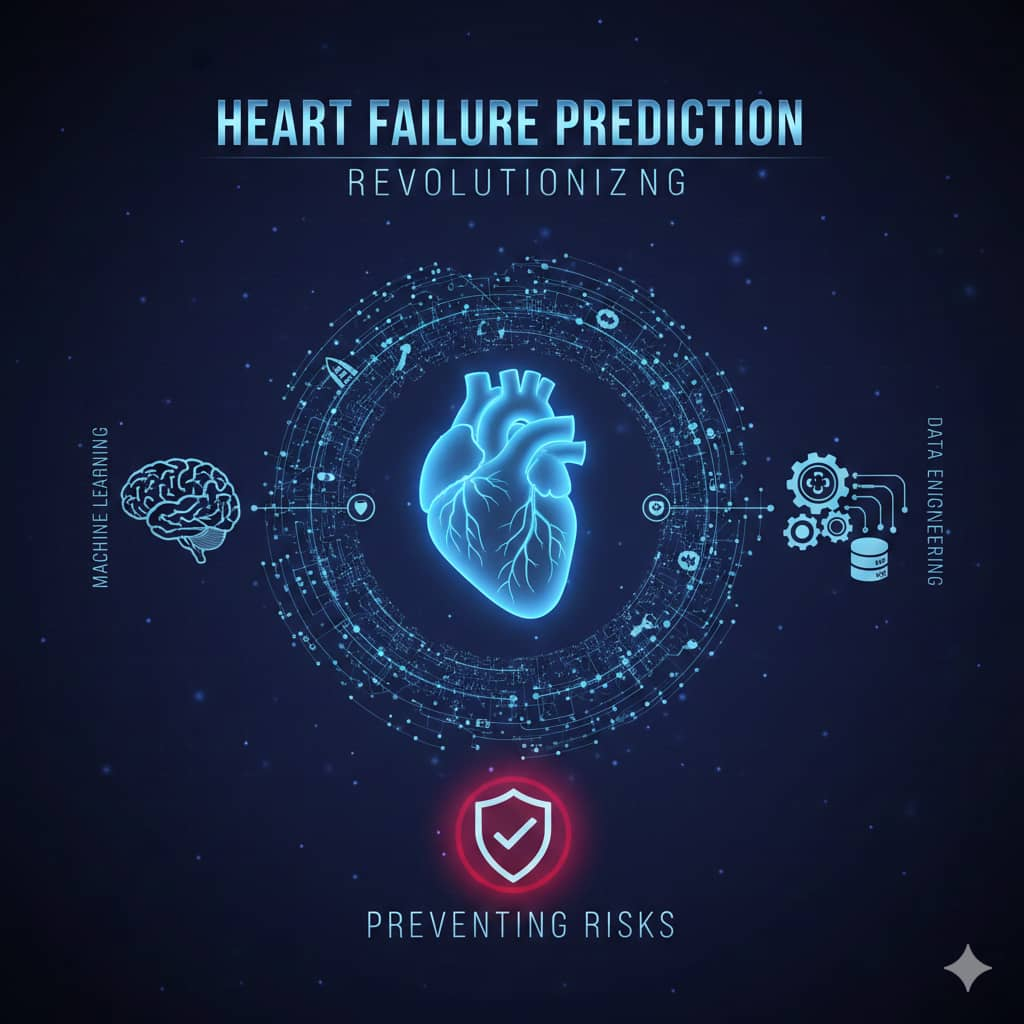


# **Predictors of Heart Failure and Mortality Outcome: A Machine Learning Analysis**

**By: Ibrahim Musbaudeen (IBMO)**

##**Project Overview**
This Python-based data science project analyzes the Heart Failure Clinical Records Dataset to identify key predictors of mortality in heart failure patients. By leveraging exploratory data analysis (EDA), feature engineering, and multiple machine learning models, the project aims to build accurate predictive models for patient outcomes (survival vs. death). The insights derived can support clinical decision-making, such as risk stratification and targeted interventions in cardiovascular care.

The dataset, sourced from Kaggle, comprises 299 patient records with 13 original features, including demographic, clinical, and laboratory metrics. The target variable is DEATH_EVENT (binary: 1 for mortality, 0 for survival during follow-up). The project emphasizes best practices: reproducible code via Jupyter Notebook, handling class imbalance, model comparison, feature importance for interpretability, and alignment with clinical literature.

**Key Objectives:**

* Explore data distributions and relationships to uncover patterns.
* Engineer new features (ratios) to capture interactions between variables.
* Train and evaluate classification models, prioritizing accuracy and precision.
* Interpret results to highlight actionable clinical predictors.

This presentation is structured for clarity, with code snippets, visualizations, and evidence-based conclusions.

##**Data Description**
The dataset includes:

* **Original Numerical Features**: age, creatinine_phosphokinase (CPK), ejection_fraction (EF), platelets, serum_creatinine (SC), serum_sodium (SS), time (follow-up duration in days).
* **Original Categorical/Binary Features**: anaemia, diabetes, high_blood_pressure, sex, smoking (all binary: 1 for yes/presence, 0 for no/absence).
* **Target**: DEATH_EVENT (imbalanced: ~68% survival [0], ~32% mortality [1]).

##**Methodology**
###**1. Data Loading and Preprocessing**

* Loaded via Kaggle API into Pandas DataFrame.
* **Features categorized**: Numerical scaled with StandardScaler; binary treated as categorical with OneHotEncoder (though already numeric).
* Engineered 15 ratio features to model interactions (e.g., df['EF_SC'] = df['ejection_fraction'] / df['serum_creatinine']).
* **Train-test split**: 80/20 with random_state=2011 or similar for reproducibility.
* **Pipeline**: ColumnTransformer for preprocessing, integrated with models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Importing Dataset from Kaaglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("guriya79/heart-failure-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.97k/3.97k [00:00<00:00, 3.72MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/guriya79/heart-failure-prediction-dataset/versions/1


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/guriya79/heart-failure-prediction-dataset/versions/1/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


##**2. Exploratory Data Analysis (EDA)**



In [ ]:
df.describe().round(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


##**Summary Statistics**:
* Age: Mean ~60 years (range 40–95).
* Ejection Fraction: Mean ~38% (critical threshold <40% indicates dysfunction).
* Serum Creatinine: Mean ~1.4 mg/dL (elevated levels signal renal issues).
* Follow-up Time: Mean ~130 days (longer times correlate with survival).

No missing values; minor outliers handled implicitly by robust models.

**Descriptive analysis of Categorical variables**

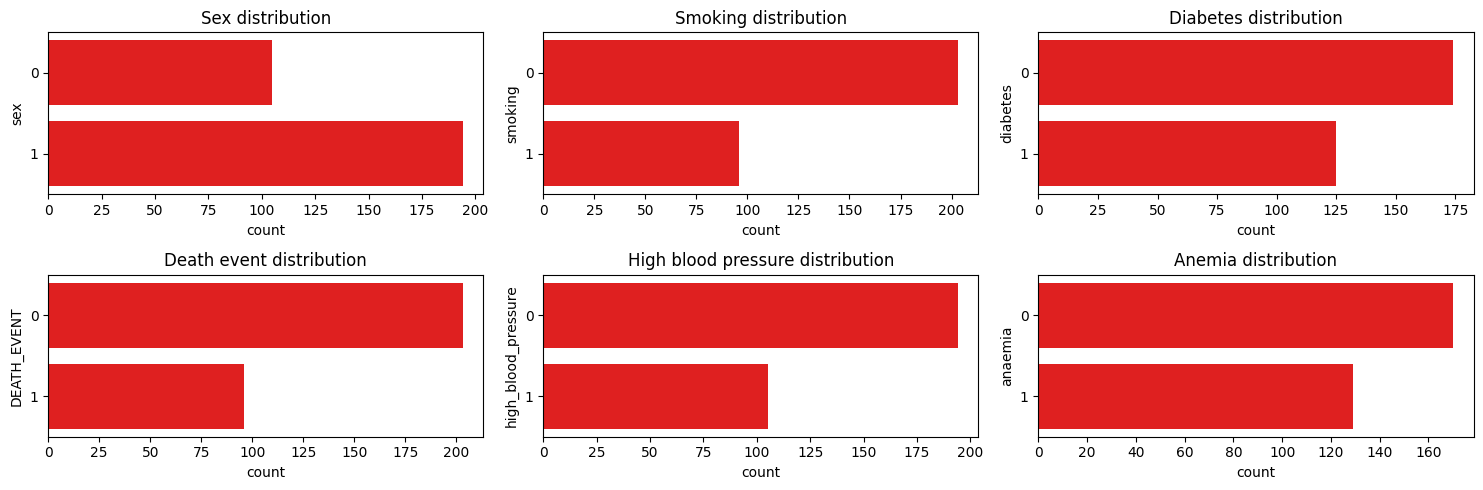

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.countplot(y='sex', data=df, color="red", ax=axes[0, 0])
axes[0, 0].set_title('Sex distribution')

sns.countplot(y='smoking', data=df, color="red", ax=axes[0, 1])
axes[0, 1].set_title('Smoking distribution')

sns.countplot(y='diabetes', data=df, color="red", ax=axes[0, 2])
axes[0, 2].set_title('Diabetes distribution')

sns.countplot(y='DEATH_EVENT', data=df, color="red", ax=axes[1, 0])
axes[1, 0].set_title('Death event distribution')

sns.countplot(y='high_blood_pressure', data=df, color="red", ax=axes[1, 1])
axes[1, 1].set_title('High blood pressure distribution')

sns.countplot(y='anaemia', data=df, color="red", ax=axes[1, 2])
axes[1, 2].set_title('Anemia distribution')

plt.tight_layout()
plt.show()

**Descriptive analysis of continous variables**

In [ ]:
df_con= df[["age","creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]

df_con.corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


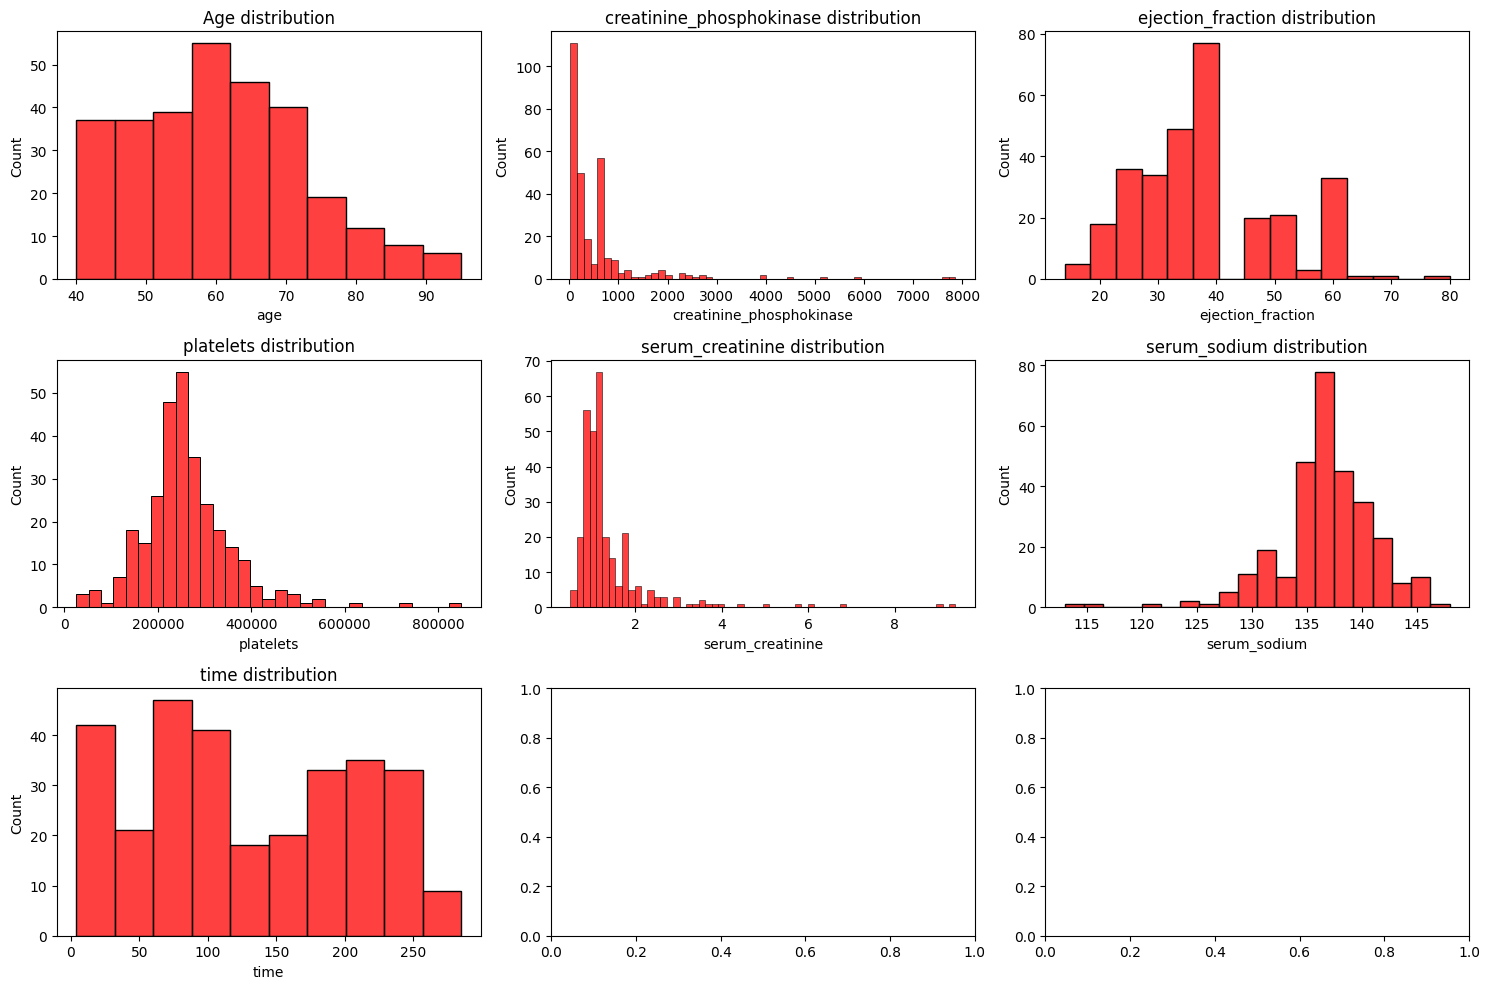

In [ ]:
fig, axes= plt.subplots(3,3, figsize=(15,10))

sns.histplot(x='age', data=df, color="red", ax=axes[0, 0])
axes[0, 0].set_title('Age distribution')

sns.histplot(x='creatinine_phosphokinase', data=df, color="red", ax=axes[0, 1])
axes[0, 1].set_title('creatinine_phosphokinase distribution')

sns.histplot(x='ejection_fraction', data=df, color="red", ax=axes[0, 2])
axes[0, 2].set_title('ejection_fraction distribution')

sns.histplot(x='platelets', data=df, color="red", ax=axes[1, 0])
axes[1, 0].set_title('platelets distribution')

sns.histplot(x='serum_creatinine', data=df, color="red", ax=axes[1, 1])
axes[1, 1].set_title('serum_creatinine distribution')

sns.histplot(x='serum_sodium', data=df, color="red", ax=axes[1, 2])
axes[1, 2].set_title('serum_sodium distribution')

sns.histplot(x='time', data=df, color="red", ax=axes[2, 0])
axes[2, 0].set_title('time distribution')

plt.tight_layout()
plt.show()

##**Creating Engineered Features**

Engineered features were created as ratios to capture potential interactions (e.g., heart-kidney axis), using the convention *Variable1_Variable2*  for *Variable1 / Variable2*.  Examples:

* **EF_SC**: Ejection fraction / Serum creatinine (heart function relative to kidney function).
* **A_EF**: Age / Ejection fraction (age-adjusted heart pumping efficiency).
* **Full list**: A_CP, A_EF, A_P, A_SC, A_SS, CP_EF, CP_P, CP_SC, CP_SS, EF_P, EF_SC, EF_SS, P_SC, P_SS, SC_SS.

In [ ]:
#ratio category
df["A_CP"]= df['age']/df['creatinine_phosphokinase']
df["A_EF"]= df['age']/df['ejection_fraction']
df["A_P"]= df['age']/df['platelets']
df["A_SC"]= df['age']/df['serum_creatinine']
df["A_SS"]= df['age']/df['serum_sodium'].round(2)
df["CP_EF"]= df['creatinine_phosphokinase']/df['ejection_fraction']
df["CP_P"]= df['creatinine_phosphokinase']/df['platelets']
df["CP_SC"]= df['creatinine_phosphokinase']/df['serum_creatinine']
df["CP_SS"]= df['creatinine_phosphokinase']/df['serum_sodium']
df["EF_P"]= df['ejection_fraction']/df['platelets']
df['EF_SC']= df['ejection_fraction']/df['serum_creatinine']
df['EF_SS']= df['ejection_fraction']/df['serum_sodium']
df["P_SC"]= df['platelets']/df['serum_creatinine']
df["P_SS"]= df['platelets']/ df['serum_sodium']
df["SC_SS"]= df['serum_creatinine']/df['serum_sodium']


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,CP_EF,CP_P,CP_SC,CP_SS,EF_P,EF_SC,EF_SS,P_SC,P_SS,SC_SS
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,...,29.100000,0.002196,306.315789,4.476923,0.000075,10.526316,0.153846,139473.684211,2038.461538,0.014615
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,...,206.868421,0.029849,7146.363636,57.801471,0.000144,34.545455,0.279412,239416.390909,1936.456103,0.008088
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,...,7.300000,0.000901,112.307692,1.131783,0.000123,15.384615,0.155039,124615.384615,1255.813953,0.010078
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,...,5.550000,0.000529,58.421053,0.810219,0.000095,10.526316,0.145985,110526.315789,1532.846715,0.013869
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,...,8.000000,0.000489,59.259259,1.379310,0.000061,7.407407,0.172414,121111.111111,2818.965517,0.023276


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  A_CP                      299 non-null    float64
 14  A_EF      

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'A_CP', 'A_EF', 'A_P', 'A_SC', 'A_SS', 'CP_EF', 'CP_P',
       'CP_SC', 'CP_SS', 'EF_P', 'EF_SC', 'EF_SS', 'P_SC', 'P_SS', 'SC_SS'],
      dtype='object')

In [ ]:
df_ratio= df[['A_CP', 'A_EF', 'A_P', 'A_SC', 'A_SS', 'CP_EF', 'CP_P',
       'CP_SC', 'CP_SS', 'EF_P', 'EF_SC', 'EF_SS', 'P_SC', 'P_SS', 'SC_SS']]

In [ ]:
df_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A_CP    299 non-null    float64
 1   A_EF    299 non-null    float64
 2   A_P     299 non-null    float64
 3   A_SC    299 non-null    float64
 4   A_SS    299 non-null    float64
 5   CP_EF   299 non-null    float64
 6   CP_P    299 non-null    float64
 7   CP_SC   299 non-null    float64
 8   CP_SS   299 non-null    float64
 9   EF_P    299 non-null    float64
 10  EF_SC   299 non-null    float64
 11  EF_SS   299 non-null    float64
 12  P_SC    299 non-null    float64
 13  P_SS    299 non-null    float64
 14  SC_SS   299 non-null    float64
dtypes: float64(15)
memory usage: 35.2 KB


In [ ]:
df_ratio.corr()

,A_CP,A_EF,A_P,A_SC,A_SS,CP_EF,CP_P,CP_SC,CP_SS,EF_P,EF_SC,EF_SS,P_SC,P_SS,SC_SS
A_CP,1.000000,0.026307,0.019939,0.019101,0.276370,-0.370749,-0.376584,-0.371940,-0.395848,-0.006320,0.006711,0.124406,-0.109499,-0.021272,0.118664
A_EF,0.026307,1.000000,0.153753,-0.043553,0.468730,0.076420,-0.038314,-0.068958,-0.035928,-0.270473,-0.637854,-0.771157,-0.260181,-0.079751,0.142400
A_P,0.019939,0.153753,1.000000,0.052140,0.290553,-0.032489,0.363825,-0.030658,-0.020843,0.879429,-0.084183,-0.007916,-0.445731,-0.573870,0.062283
A_SC,0.019101,-0.043553,0.052140,1.000000,0.226438,-0.006604,0.032384,0.164114,0.013633,0.053801,0.692831,0.150106,0.550296,-0.020122,-0.666309
A_SS,0.276370,0.468730,0.290553,0.226438,1.000000,-0.094476,-0.051692,-0.127367,-0.079995,0.075296,-0.180387,0.052056,-0.261144,-0.036673,0.198878
CP_EF,-0.370749,0.076420,-0.032489,-0.006604,-0.094476,1.000000,0.782174,0.927563,0.963896,-0.071594,-0.091774,-0.183266,0.054338,0.021504,-0.044654
CP_P,-0.376584,-0.038314,0.363825,0.032384,-0.051692,0.782174,1.000000,0.798652,0.838516,0.372082,-0.002542,-0.035110,-0.141842,-0.245695,-0.024640
CP_SC,-0.371940,-0.068958,-0.030658,0.164114,-0.127367,0.927563,0.798652,1.000000,0.947603,-0.013296,0.126514,-0.051695,0.208554,0.037457,-0.168239
CP_SS,-0.395848,-0.035928,-0.020843,0.013633,-0.079995,0.963896,0.838516,0.947603,1.000000,-0.011722,-0.010619,-0.049905,0.062779,0.020129,-0.024401
EF_P,-0.006320,-0.270473,0.879429,0.053801,0.075296,-0.071594,0.372082,-0.013296,-0.011722,1.000000,0.211845,0.374483,-0.358928,-0.550143,0.032792


##**Distribution of Death Event by Categorical factors**

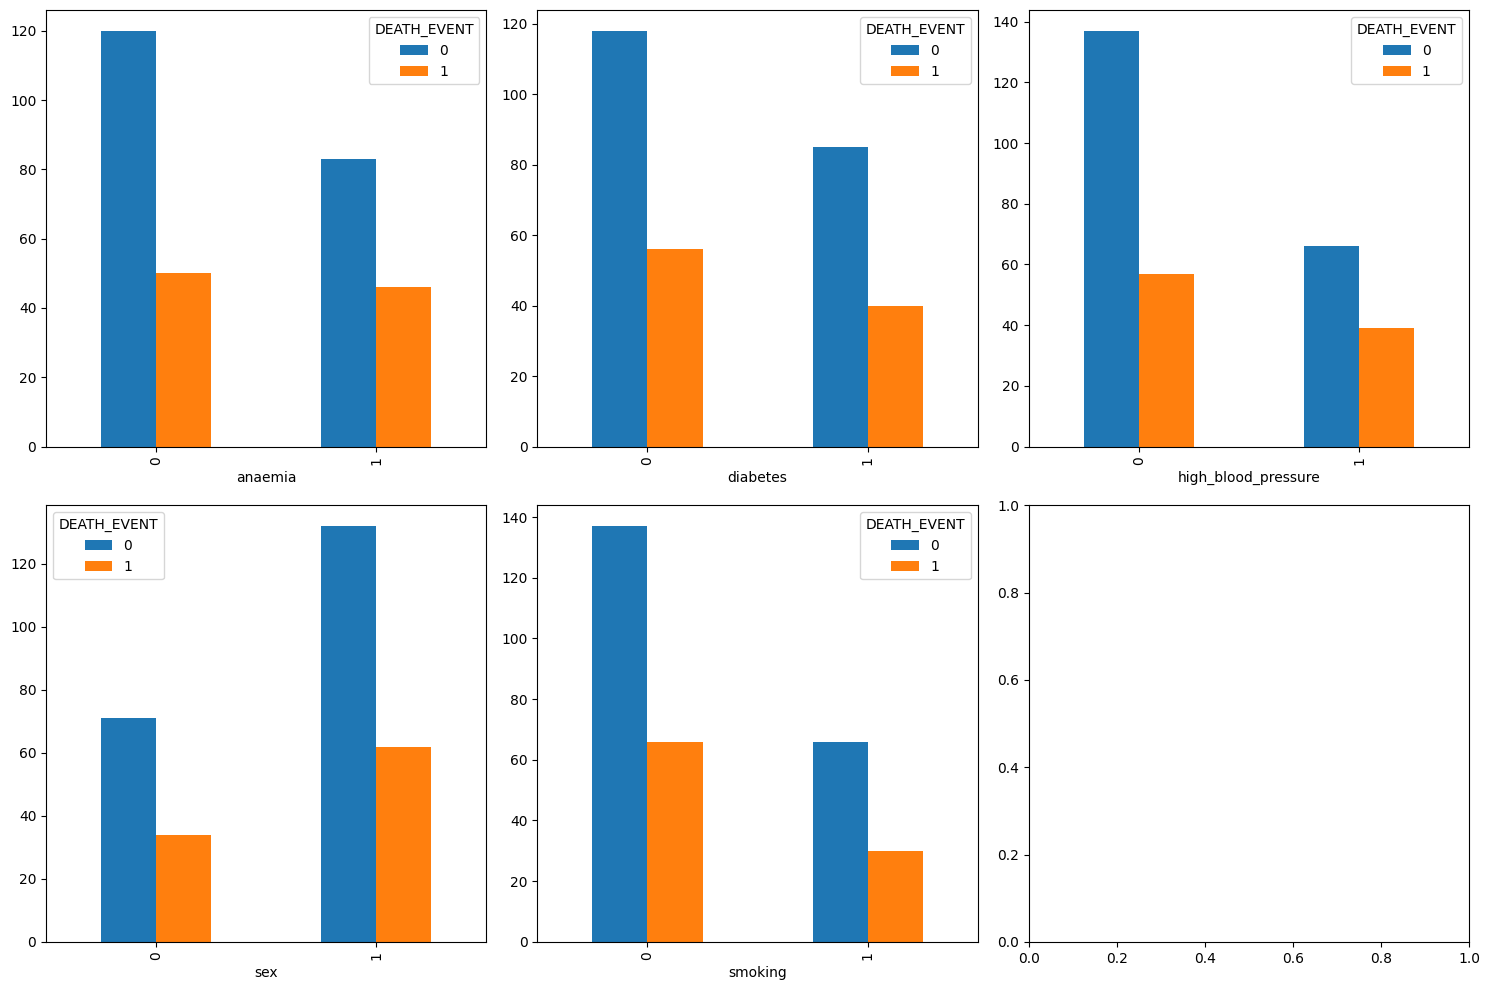

In [ ]:
fig, axes =plt.subplots(2,3, figsize=(15,10))

#Creating a cross-tabulation

#anaemia vs death event
anaemia_death_crosstab= pd.crosstab(df['anaemia'], df['DEATH_EVENT'])

#diabetes vs death event
diabetes_death_crosstab= pd.crosstab(df['diabetes'], df['DEATH_EVENT'])

#HPB vs death event
high_blood_pressure_death_crosstab= pd.crosstab(df['high_blood_pressure'], df['DEATH_EVENT'])

#sex vs death event
sex_death_crosstab= pd.crosstab(df['sex'], df['DEATH_EVENT'])

#smoking vs death event
smoking_death_crosstab= pd.crosstab(df['smoking'], df['DEATH_EVENT'])

#Creating a bar plot
anaemia_death_crosstab.plot(kind='bar', ax= axes[0][0])
diabetes_death_crosstab.plot(kind='bar', ax= axes[0][1])
high_blood_pressure_death_crosstab.plot(kind='bar', ax= axes[0][2])
sex_death_crosstab.plot(kind='bar', ax= axes[1][0])
smoking_death_crosstab.plot(kind='bar', ax= axes[1][1])

plt.tight_layout()
plt.show()


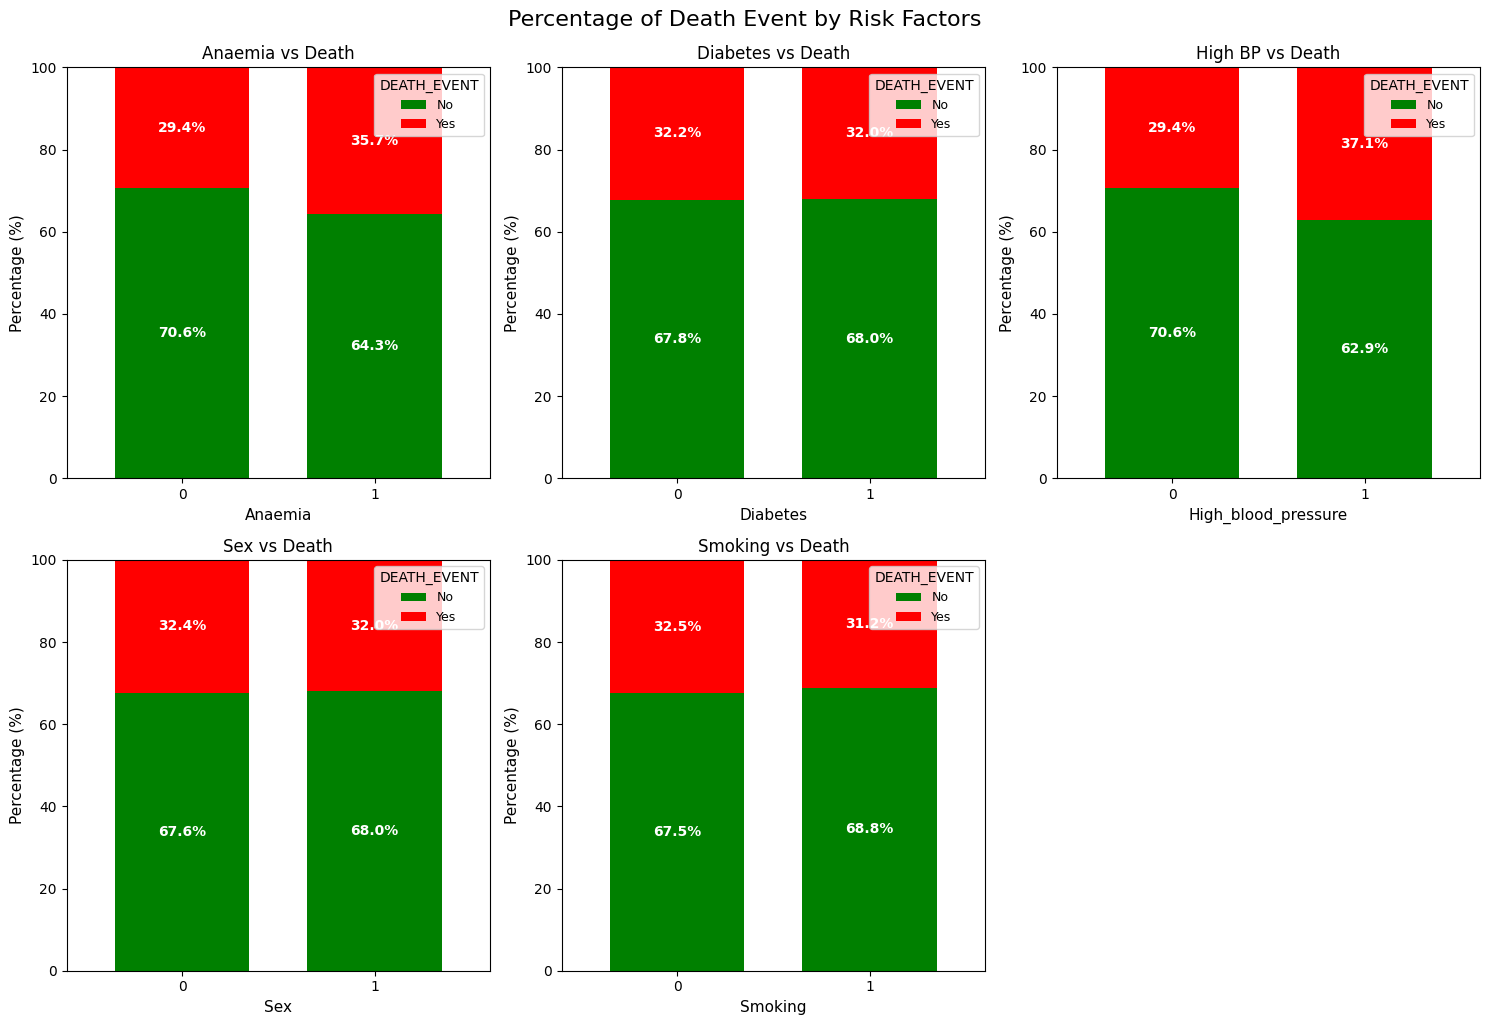

In [ ]:
#Creating normalized Crsstab (Categorical Variables versus Target variable)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Easier to index as 1D array

# List of factors and nice titles
factors = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
titles = ['Anaemia vs Death', 'Diabetes vs Death', 'High BP vs Death',
          'Sex vs Death', 'Smoking vs Death']

for i, (factor, title) in enumerate(zip(factors, titles)):
    # Create normalized crosstab → percentages by row (×100)
    ct = pd.crosstab(df[factor], df['DEATH_EVENT'], normalize='index').mul(100).round(1)

    # Plot 100% stacked bar
    ax = ct.plot(kind='bar',
                 stacked=True,
                 ax=axes[i],
                 rot=0,
                 color=['green', 'red'],  # nice colors: no-death, death
                 width=0.7)

    # Add percentage labels inside each segment
    for container in ax.containers:
        ax.bar_label(container,
                     label_type='center',
                     fmt='%.1f%%',
                     color='white',
                     fontsize=10,
                     weight='bold')

    ax.set_title(title, fontsize=12)
    ax.set_xlabel(factor.capitalize(), fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_ylim(0, 100)  # Force y-axis to 0-100
    ax.legend(title='DEATH_EVENT', labels=['No', 'Yes'],
              loc='upper right', fontsize=9)

# Remove empty subplots if any (you have 5 plots, 6 subplots)
for j in range(5, 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Percentage of Death Event by Risk Factors', fontsize=16, y=1.02)
plt.show()



* **Crosstabs:** Percentage-based stacked bar plots for mortality by risk factors shows a higher death rates in among patients who have anaemia or high blood pressure by 6.3% and 7.7% respectively).


##**Distribution of Death Event by Numerical factors**

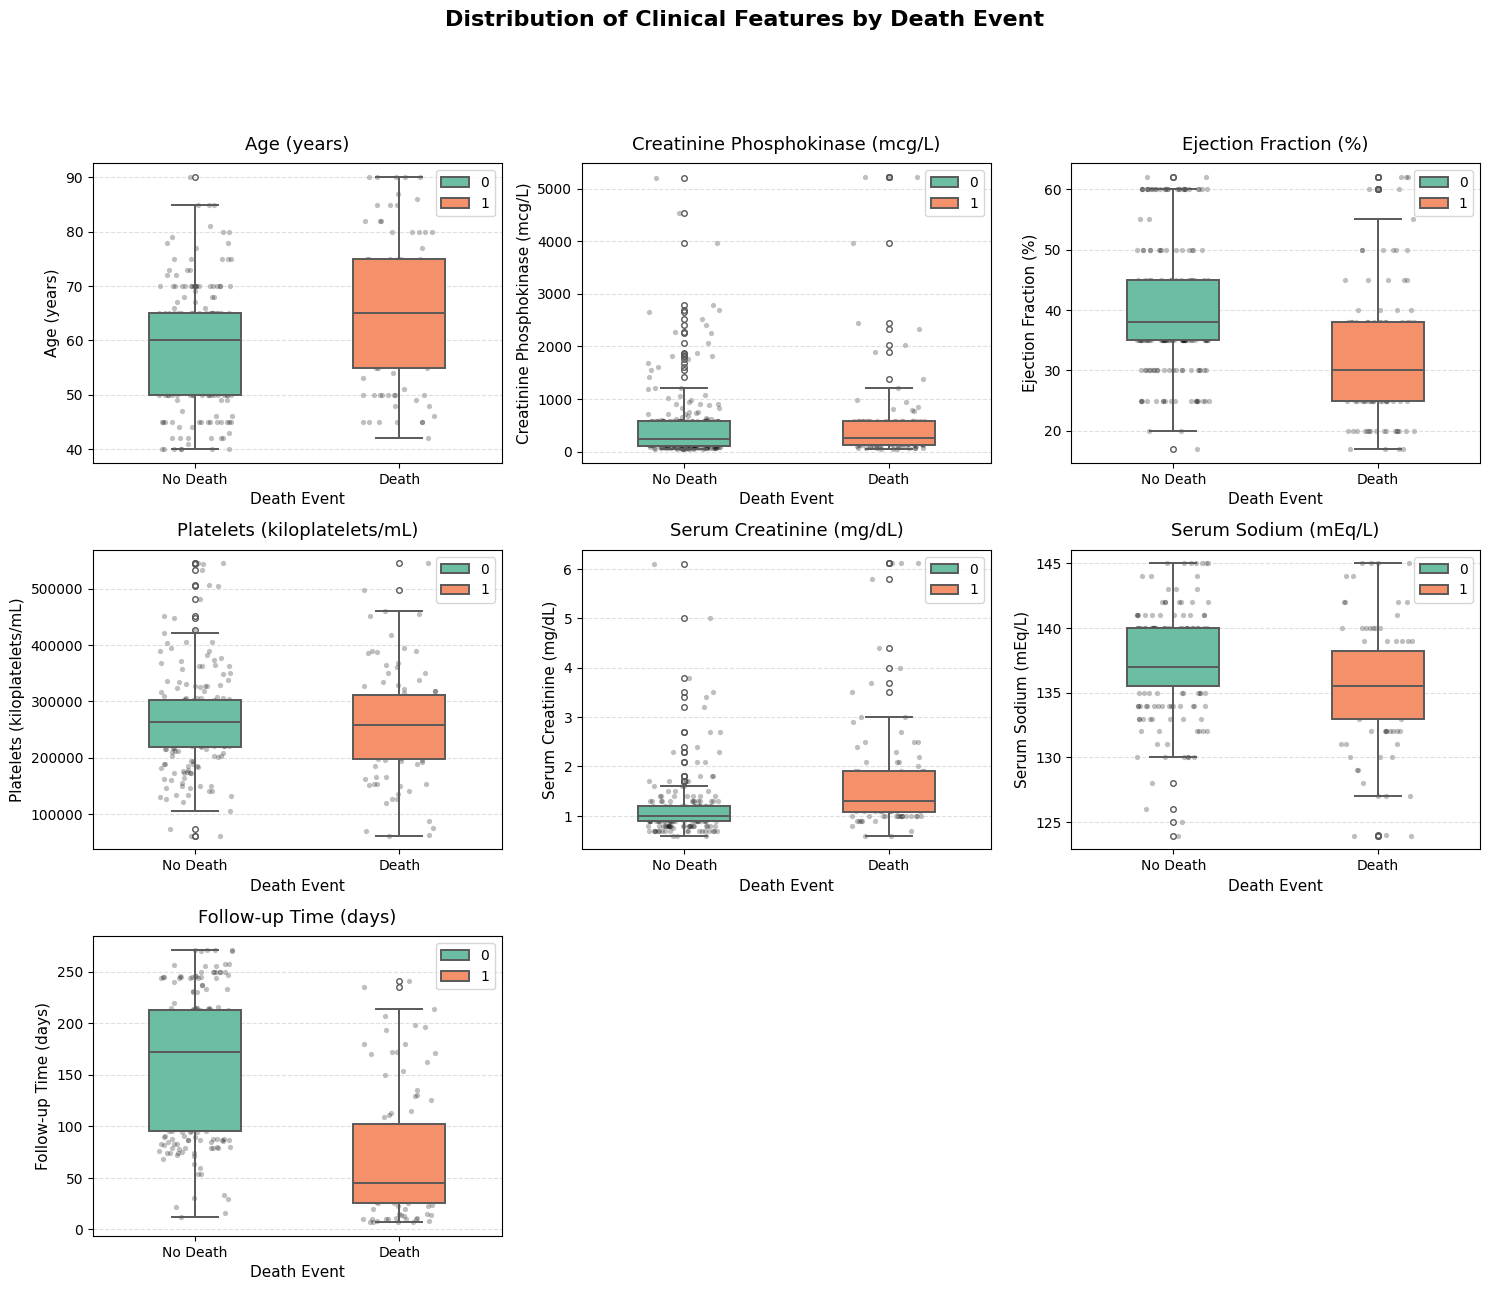

In [ ]:
#  Goal: Boxplots of numeric features grouped by DEATH_EVENT (0/1)

# List of numeric features you want to compare
numeric_features = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time"
]
#clipping Outliers
for col in numeric_features:
    df[col] = df[col].clip(
        lower=df[col].quantile(0.01),
        upper=df[col].quantile(0.99))


# Create nice display names
pretty_names = {
    "age": "Age (years)",
    "creatinine_phosphokinase": "Creatinine Phosphokinase (mcg/L)",
    "ejection_fraction": "Ejection Fraction (%)",
    "platelets": "Platelets (kiloplatelets/mL)",
    "serum_creatinine": "Serum Creatinine (mg/dL)",
    "serum_sodium": "Serum Sodium (mEq/L)",
    "time": "Follow-up Time (days)"
}

# Prepare figure
n_features = len(numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols   # ceiling division

fig, axes = plt.subplots(n_rows, n_cols,
                        figsize=(n_cols*5, n_rows*4.2),
                        sharey=False)   # ← each variable has different scale → no sharey

# Flatten so we can iterate easily
axes = axes.flatten()

# Colors: consistent for no-death / death
colors = ['#66c2a5', '#fc8d62']   # nice contrasting seaborn-style colors

# Main plotting loop
for i, feature in enumerate(numeric_features):

    ax = axes[i]

    # Modern & clean way → using seaborn boxplot
    sns.boxplot(data=df,
                x='DEATH_EVENT',
                y=feature,
                ax=ax,
                palette=colors,
                width=0.45,
                fliersize=4,
                linewidth=1.4,
                saturation=0.9,
                hue= 'DEATH_EVENT')

    # Optional: add stripplot (individual points) - looks better with small/medium datasets
    sns.stripplot(data=df,
                 x='DEATH_EVENT',
                 y=feature,
                 ax=ax,
                 color='black',
                 alpha=0.25,
                 size=3.8,
                 jitter=0.18,
                 zorder=0)

    # Titles & labels
    ax.set_title(pretty_names.get(feature, feature), fontsize=13, pad=10)
    ax.set_xlabel("Death Event", fontsize=11)
    ax.set_ylabel(pretty_names.get(feature, feature), fontsize=11)

    # Better x-tick labels
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No Death", "Death"], fontsize=10)

    # Optional: horizontal grid only
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.set_axisbelow(True)

# Cleaning up empty subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Final touches
plt.suptitle("Distribution of Clinical Features by Death Event",
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

### **Insight:**
The result in the boxplot visualisation comparing the level of numeric variables and Death event illuminates that:

1. Higher variables related to Death Event:

    * The boxplot illustrates that higher level of **serum creatinine** and **older patients** are associated to **lower chance of survival**.

2. Lower variables related to Death Event:
    * The boxplot illustrates that lower level of** Ejection fraction**, **serum sodium** and lower **follow up time** are associated to **lower chance of survival**.


##**Distribution of Death Event by Feature engineered Numerical factors**

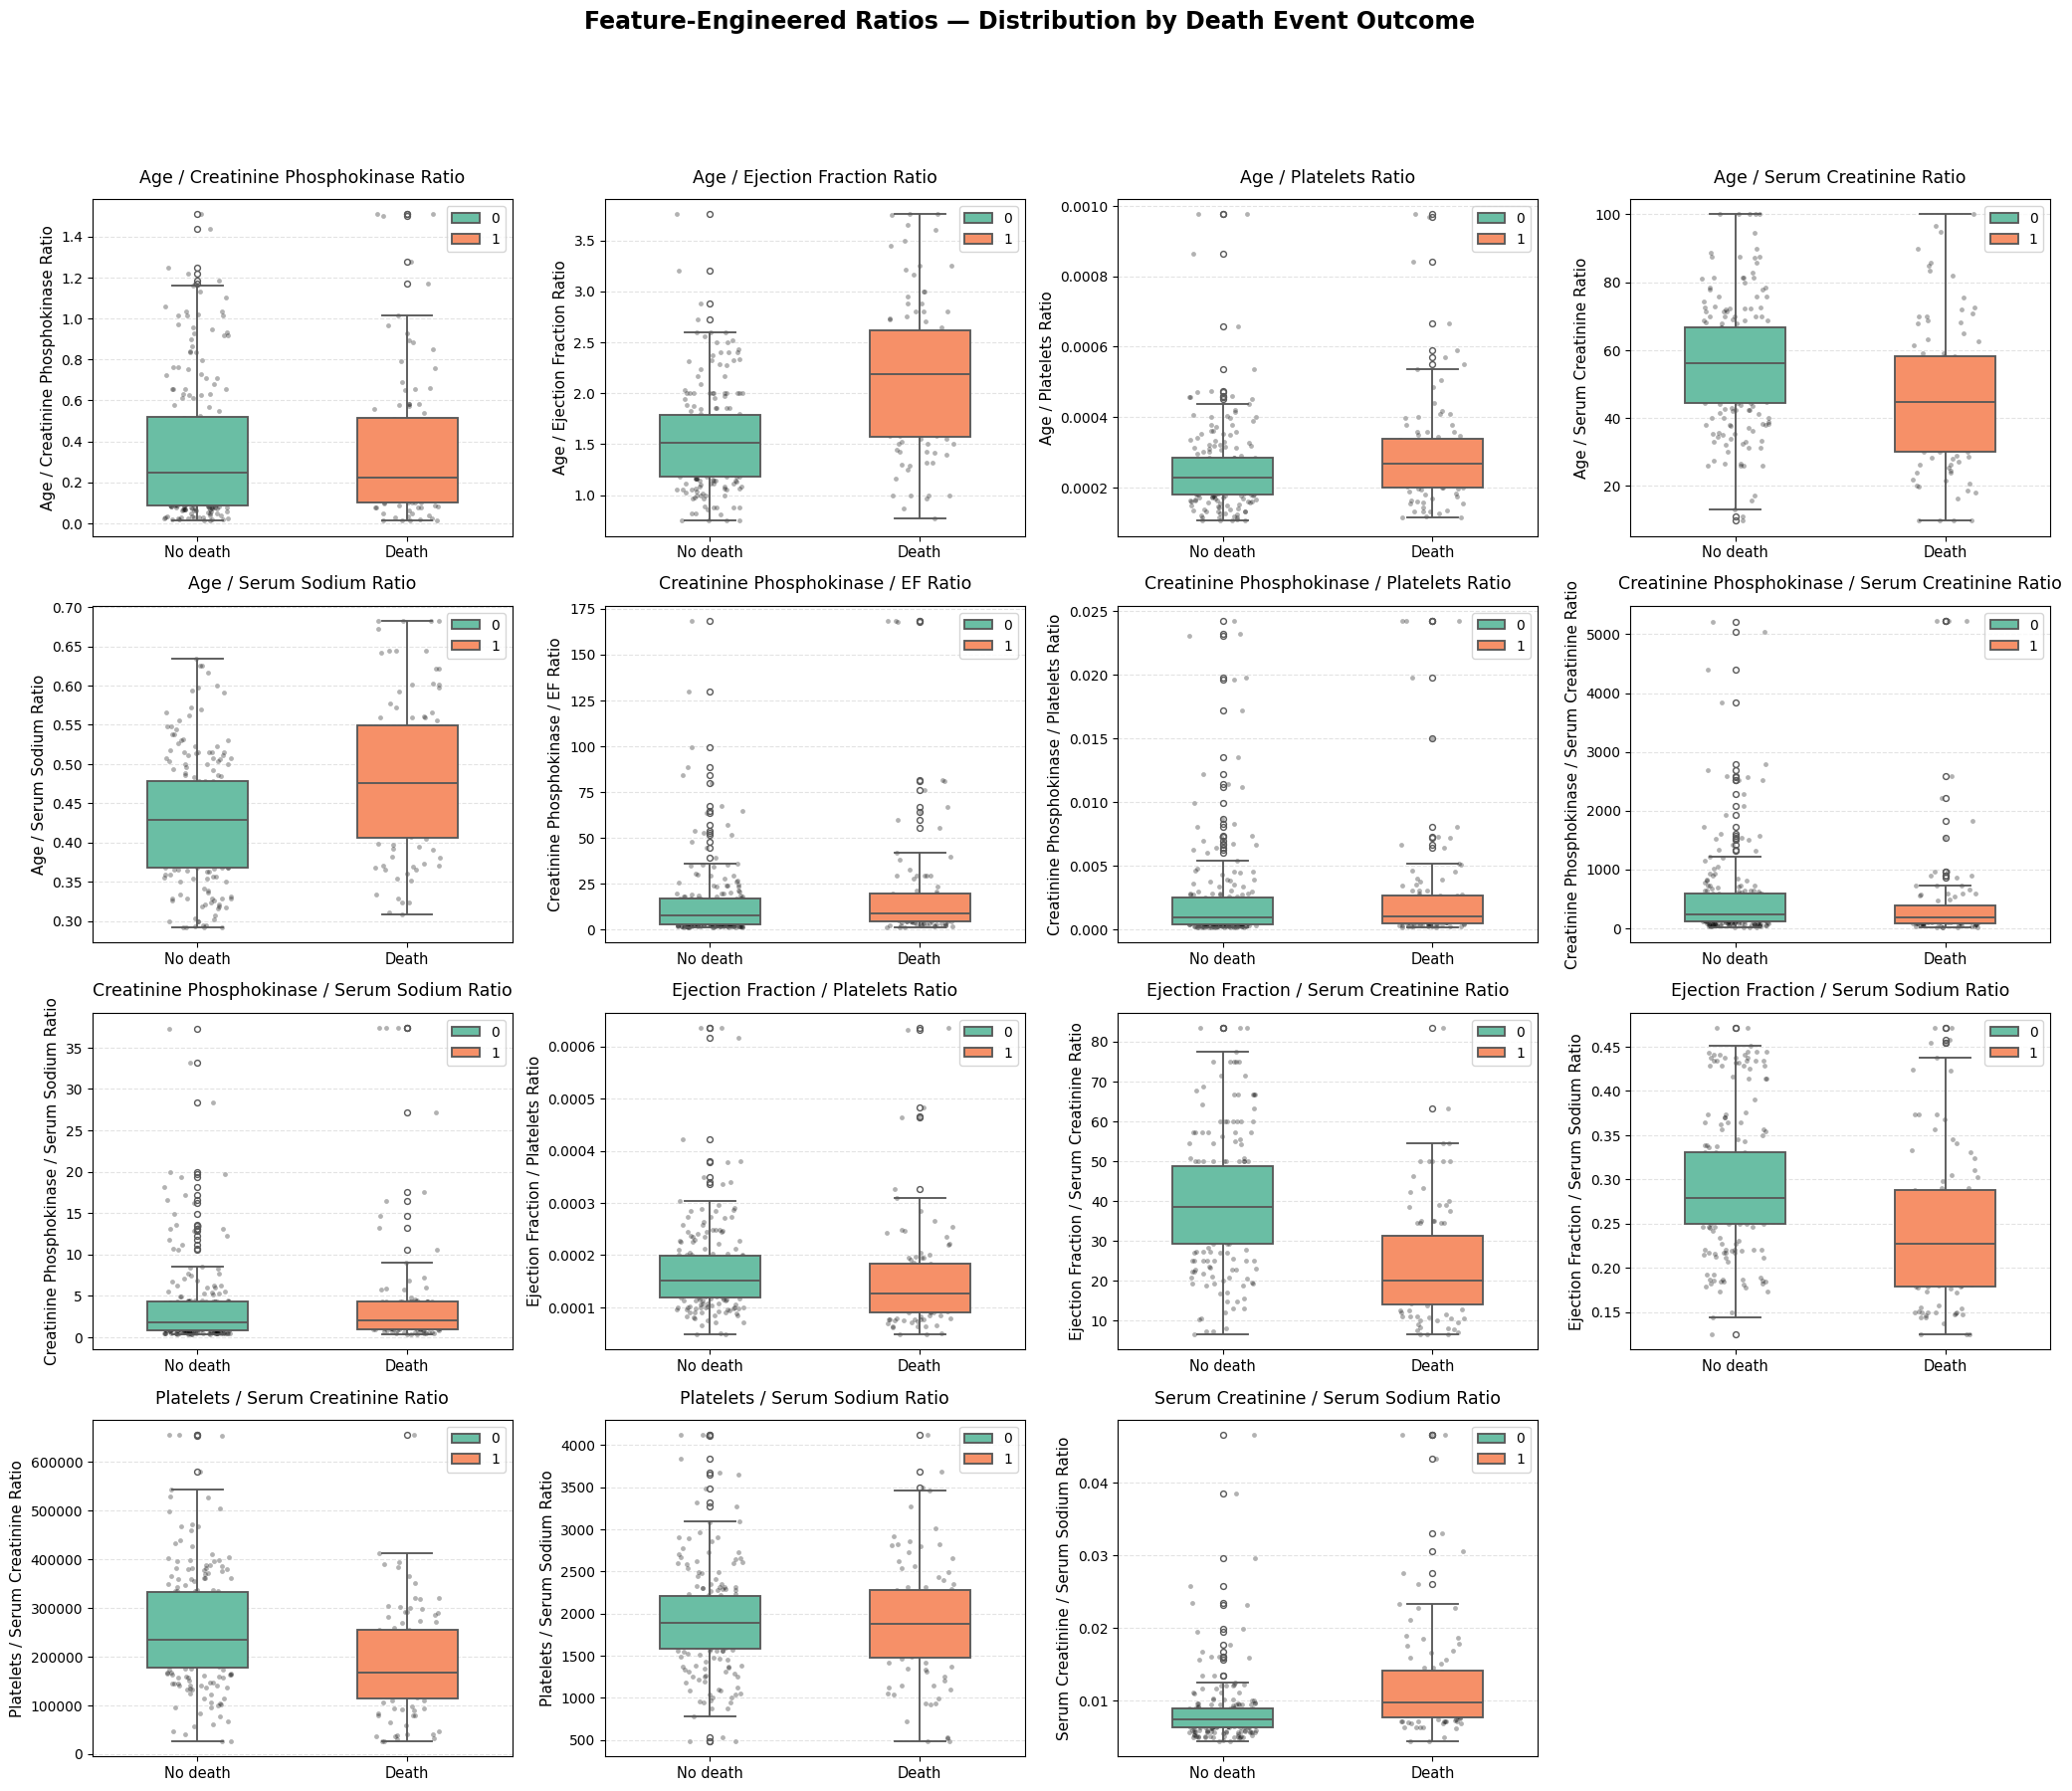

In [ ]:
# List of numeric features you want to compare
FE_numeric_features = [
    'A_CP', 'A_EF', 'A_P', 'A_SC', 'A_SS',
    'CP_EF', 'CP_P', 'CP_SC', 'CP_SS', 'EF_P', 'EF_SC', 'EF_SS', 'P_SC', 'P_SS', 'SC_SS'
]

#clipping Outliers
for col in FE_numeric_features:
    df[col] = df[col].clip(
        lower=df[col].quantile(0.01),
        upper=df[col].quantile(0.99))

# Complete pretty names (added missing ones)
pretty_names = {
    "A_CP": "Age / Creatinine Phosphokinase Ratio",
    "A_EF": "Age / Ejection Fraction Ratio",
    "A_P":  "Age / Platelets Ratio",
    "A_SC": "Age / Serum Creatinine Ratio",
    "A_SS": "Age / Serum Sodium Ratio",
    "CP_EF": "Creatinine Phosphokinase / EF Ratio",
    "CP_P":  "Creatinine Phosphokinase / Platelets Ratio",
    "CP_SC": "Creatinine Phosphokinase / Serum Creatinine Ratio",
    "CP_SS": "Creatinine Phosphokinase / Serum Sodium Ratio",
    "EF_P":  "Ejection Fraction / Platelets Ratio",
    "EF_SC": "Ejection Fraction / Serum Creatinine Ratio",
    "EF_SS": "Ejection Fraction / Serum Sodium Ratio",
    "P_SC":  "Platelets / Serum Creatinine Ratio",
    "P_SS":  "Platelets / Serum Sodium Ratio",
    "SC_SS": "Serum Creatinine / Serum Sodium Ratio"
}

# ─── Figure setup ────────────────────────────────────────
n_features = len(FE_numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols,
                        figsize=(n_cols*5.2, n_rows*4.4),
                        sharey=False)

axes = axes.flatten()

# Nice contrasting colors: survived → green, died → orange
colors = ['#66c2a5', '#fc8d62']

# Main plotting loop
for i, feature in enumerate(FE_numeric_features):
    ax = axes[i]

    # Modern preferred way (cleaner)
    sns.boxplot(data=df,
                x='DEATH_EVENT',
                y=feature,
                ax=ax,
                palette=colors,
                width=0.48,
                fliersize=4.2,
                linewidth=1.35,
                saturation=0.92,
                hue='DEATH_EVENT')

    # Optional: show individual points (good for medical datasets)
    sns.stripplot(data=df,
                 x='DEATH_EVENT',
                 y=feature,
                 ax=ax,
                 color='black',
                 alpha=0.3,
                 size=3.5,
                 jitter=0.16,
                 zorder=0)

    # Titles & labels
    nice_name = pretty_names.get(feature, feature)
    ax.set_title(nice_name, fontsize=12.5, pad=12)
    ax.set_xlabel(None)                       # cleaner look
    ax.set_ylabel(nice_name, fontsize=11)

    # Better x-ticks
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No death", "Death"], fontsize=10.5)

    # Light horizontal grid
    ax.grid(axis='y', linestyle='--', alpha=0.35)
    ax.set_axisbelow(True)

# Hide unused subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Final styling
plt.suptitle("Feature-Engineered Ratios — Distribution by Death Event Outcome",
             fontsize=17, fontweight='bold', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Insight:**
The result in the boxplot visualisation comparing the level of Feature Engineered numeric clinical variables and Death event illuminates that:

1. Higher variables related to Death Event:

    * The boxplot illustrates that **HIGHER** level of **Age/Ejection Fraction Ratio**, **Age/Serum Sodium Ratio** and **Serum Creatinine/Serum Sodium Ratio** are associated to **lower chance of survival**.

2. Lower variables related to Death Event:
    * The boxplot illustrates that **LOWER** level of **Age/Serum Creatinine Ratio**, **Ejection Fraction/Serum Creatinine Ratio**, **Ejection Fraction/Serum Sodium Ratio** and **Platelets/Serum Creatinine Ratio** are associated to **lower chance of survival**.


## **3. Modeling**
Models were selected for their strength in handling small, imbalanced datasets with mixed features. Class imbalance addressed via parameters like class_weight='balanced' or scale_pos_weight.

* Logistic Regression: Baseline linear model.
* Random Forest: Ensemble with min_samples_split=10, min_samples_leaf=2.
* XGBoost: Boosting with n_estimators=400, learning_rate=0.05, scale_pos_weight=3.
* CatBoost: Categorical-focused boosting with iterations=500, auto_class_weights='Balanced'

##**Model Fitting and Evaluation**

In [ ]:
# Correctly identify categorical and numerical features from the X DataFrame
# X is already defined by dropping 'DEATH_EVENT' from df.

# Define actual categorical features present in X
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Define numerical features by taking all columns in X and removing the categorical ones
all_features_in_X = X.columns.tolist()
numerical_features = [col for col in all_features_in_X if col not in categorical_features]

# Assign these to cat_features and num_features for use in the ColumnTransformer
cat_features = categorical_features
num_features = numerical_features

In [ ]:
# transforming the numeric and categorical features

# Identify numerical and categorical features based on previous exploration
numerical_features = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
    'serum_creatinine', 'serum_sodium', 'time', 'A_CP', 'A_EF', 'A_P', 'A_SC', 'A_SS',
    'CP_EF', 'CP_P', 'CP_SC', 'CP_SS', 'EF_P', 'EF_SC', 'EF_SS', 'P_SC', 'P_SS', 'SC_SS'
]
categorical_features = [
    'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'
]

# Create a column transformer for preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Feature Selection (dropping target variable)
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## **4. Evaluation**
Models evaluated on test set using accuracy (overall performance) and precision (minimizing false positives for mortality).

###**Logistics Regression**

In [ ]:
#Creating a pipeline with preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                 ('classifier', LogisticRegression())])

#training the model
model.fit(X_train, y_train)

#Evaluating performance
#Prediction of Test set results
y_pred = model.predict(X_test) # Corrected: Use predict to get class labels from the trained model
y_pred_proba = model.predict_proba(X_test)[:, 1]

#calculating the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # Corrected: Fixed typo 'precidion' to 'precision'

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%') # Corrected: Used fixed variable name 'precision'

Accuracy: 76.67%
Precision: 69.23%


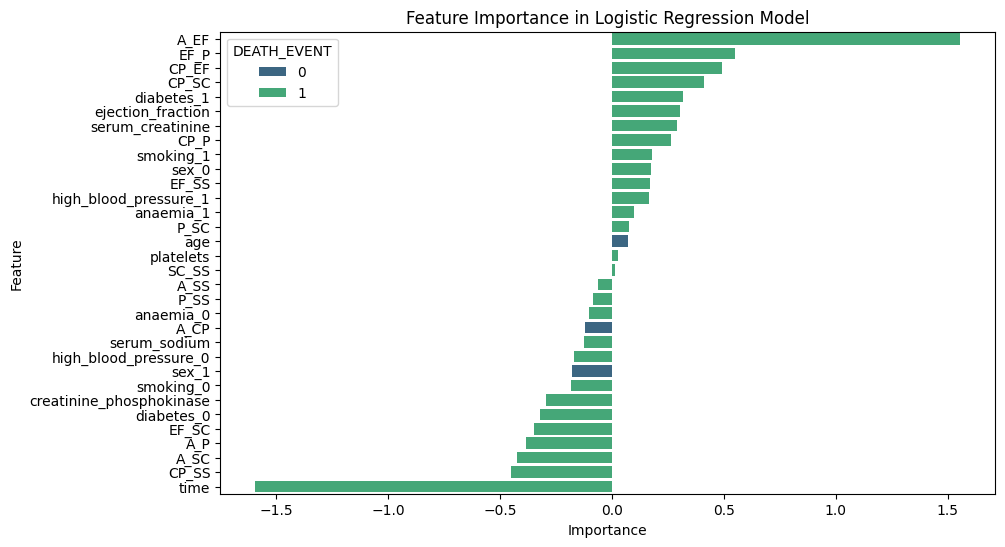

In [ ]:
# Model Interpretation - Feature Importance
importance = model.named_steps['classifier'].coef_[0]


# Get feature names after one-hot encoding
feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# Combine numeric and categorical feature names
all_feature_names = np.concatenate([num_features, feature_names])

# Combine names and importances and sort by importance
combined = zip(all_feature_names, importance)
sorted_features = sorted(combined, key=lambda x: x[1], reverse=True)  # Sort by importance

# Unzip the sorted tuples
sorted_feature_names, sorted_importance = zip(*sorted_features)

# Create a DataFrame for Seaborn
importance_df = pd.DataFrame({'Feature': sorted_feature_names, 'Importance': sorted_importance})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, orient='h', palette='viridis', hue=y)
plt.title('Feature Importance in Logistic Regression Model')
# plt.gca().invert_yaxis()  # Optional: Invert y-axis to have the largest bar at the top
plt.show()

##**Decision Tree Classifier Model**

In [ ]:
# Creating a pipeline with preprocessing and model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(min_samples_split=10, min_samples_leaf=2, random_state=2011))])

# Training the Random Forest model
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_2 = rf_model.predict(X_test)
y_pred_proba_2 = rf_model.predict_proba(X_test)[:, 1]

# Calculating performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_2)
precision_rf = precision_score(y_test, y_pred_2)

print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print(f'Precision: {precision_rf * 100:.2f}%')

Accuracy: 81.67%
Precision: 75.00%


In [ ]:

# Define a range of hyperparameters for tuning
param_grid = {
    'classifier__max_depth': [None, 10, 15, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='precision')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:\n", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best hyperparameters:
 {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}


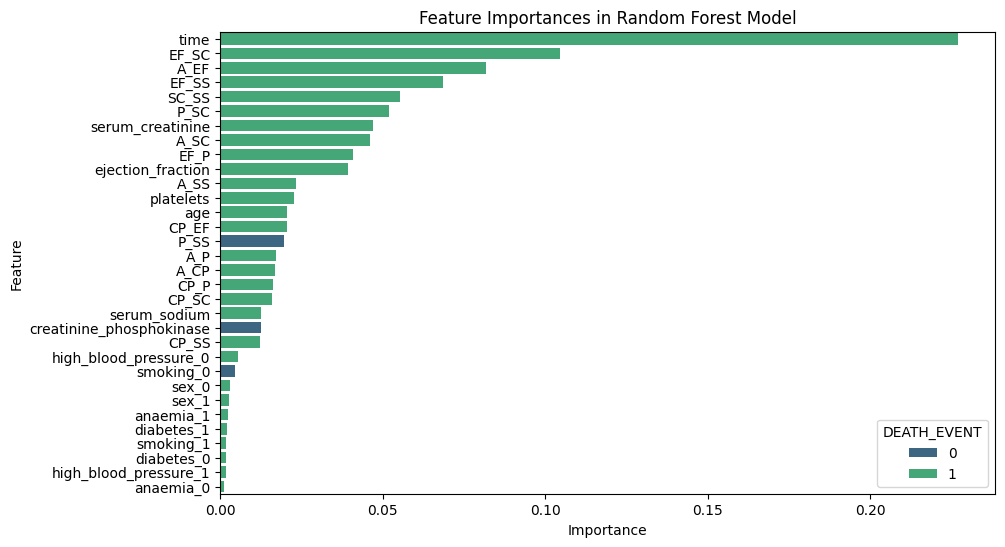

In [ ]:
# Extracting feature importances
feature_importances = rf_model.named_steps['classifier'].feature_importances_

# Handling feature names for one-hot encoded categories
ohe_categories = rf_model.named_steps['preprocessor'].named_transformers_['cat'].categories_
new_feature_names = [f'{col}_{cat}' for col, cats in zip(cat_features, ohe_categories) for cat in cats]
all_feature_names = num_features + new_feature_names

# Mapping importances to features
importance_dict = dict(zip(all_feature_names, feature_importances))

# Sorting features by importance
importances_sorted = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Creating a DataFrame for easier plotting
importances_df = pd.DataFrame(importances_sorted, columns=['Feature', 'Importance'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, orient='h', palette='viridis', hue=y)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##**XGBoost model**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.pipeline import Pipeline

# XGBoost Pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=400,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,          # L2 regularization
        random_state=42,
        eval_metric='logloss',
        scale_pos_weight=3       # ← very important for imbalanced data!
    ))
])

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"Accuracy: {acc_xgb*100:.2f}%")
print(f"Precision: {prec_xgb*100:.2f}%")

XGBoost Results:
Accuracy: 78.33%
Precision: 68.75%


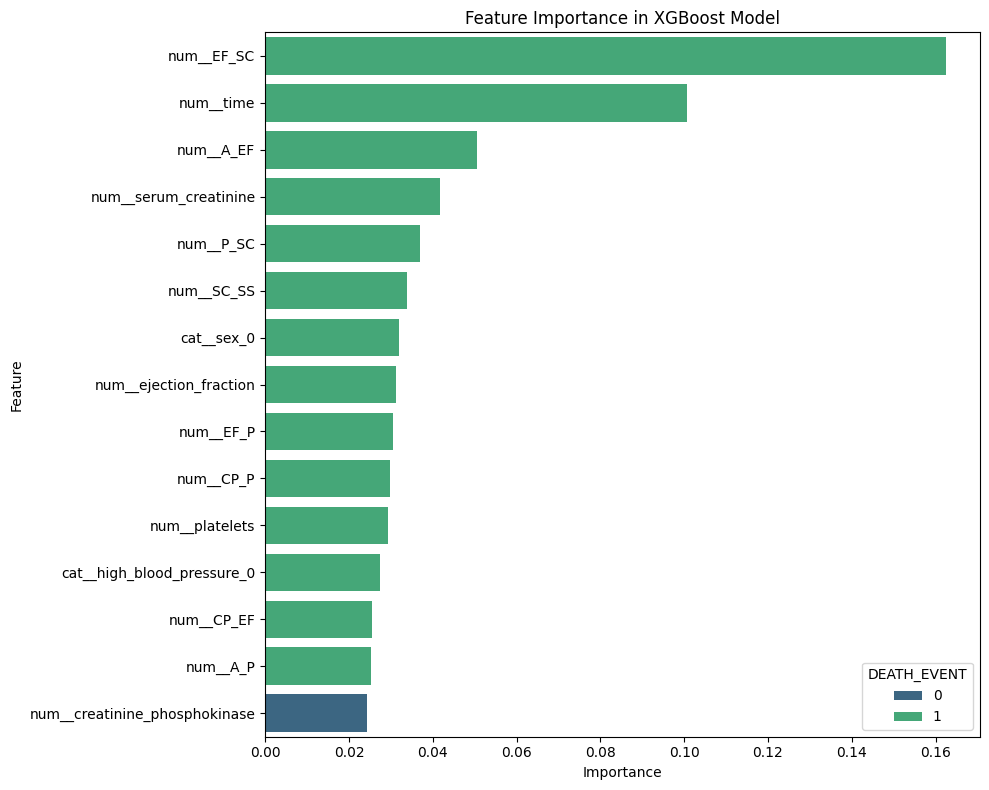

In [ ]:
import xgboost as xgb # Import xgboost with alias 'xgb'

# Model Interpretation - Feature Importance for XGBoost
# Get feature importances from the trained XGBoost classifier
importance = xgb_model.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
feature_names_processed = xgb_model.named_steps['preprocessor'].get_feature_names_out()

# Combine names and importances and sort by importance
combined = zip(feature_names_processed, importance)
sorted_features = sorted(combined, key=lambda x: x[1], reverse=True)  # Sort by importance

# Unzip the sorted tuples
sorted_feature_names, sorted_importance = zip(*sorted_features)

# Create a DataFrame for Seaborn
importance_df_xgb = pd.DataFrame({'Feature': sorted_feature_names, 'Importance': sorted_importance})

# Plot using Seaborn
plt.figure(figsize=(10, 8)) # Adjusted figure size for better readability
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb.head(15), orient='h', palette='viridis', hue=y) # Limiting to top 15 for clarity
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

##**Catboost Model**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostClassifier

#CatBoost Pipeline
cat_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        l2_leaf_reg=3.0,
        auto_class_weights='Balanced',
        random_seed=42,
        eval_metric='AUC',
        verbose=100
    ))
])

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]

# Metrics
acc_cat = accuracy_score(y_test, y_pred_cat)
prec_cat = precision_score(y_test, y_pred_cat)

print("CatBoost Results:")
print(f"Accuracy: {acc_cat*100:.2f}%")
print(f"Precision: {prec_cat*100:.2f}%")

0:	total: 59.1ms	remaining: 29.5s
100:	total: 1.57s	remaining: 6.21s
200:	total: 2.62s	remaining: 3.9s
300:	total: 3.32s	remaining: 2.19s
400:	total: 4.14s	remaining: 1.02s
499:	total: 5.11s	remaining: 0us
CatBoost Results:
Accuracy: 78.33%
Precision: 68.75%


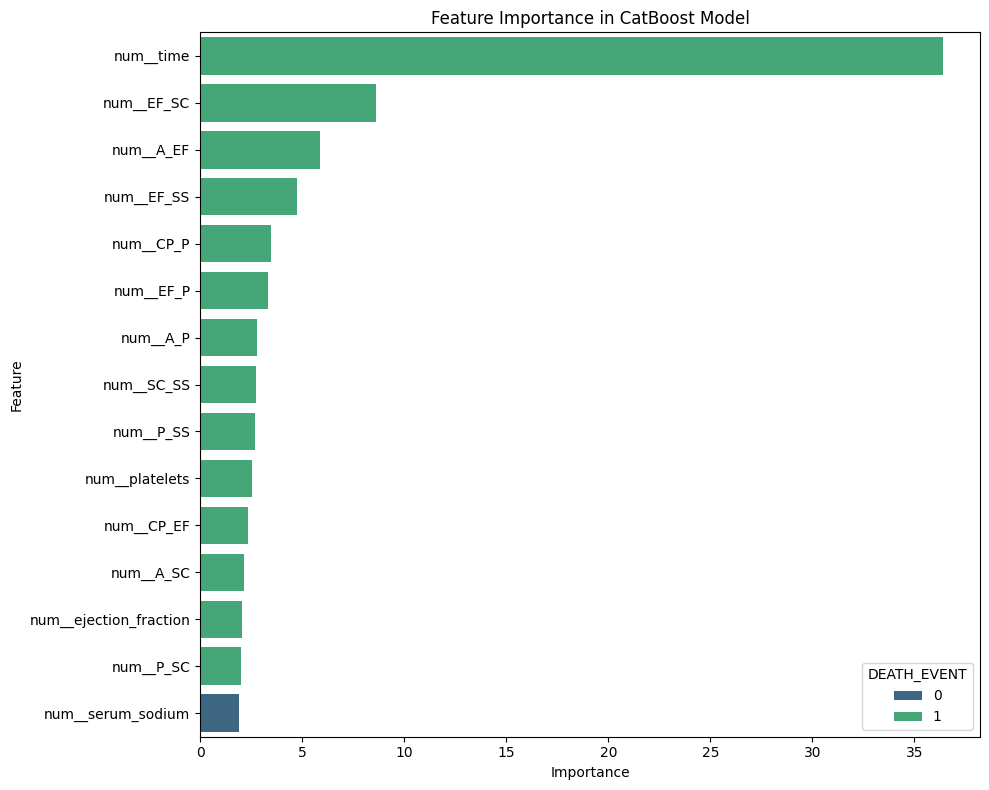

In [ ]:
# Model Interpretation - Feature Importance for CatBoost
# Get feature importances from the trained CatBoost classifier
importance = cat_model.named_steps['classifier'].get_feature_importance()

# Get feature names after preprocessing
feature_names_processed = cat_model.named_steps['preprocessor'].get_feature_names_out()

# Combine names and importances and sort by importance
combined = zip(feature_names_processed, importance)
sorted_features = sorted(combined, key=lambda x: x[1], reverse=True)  # Sort by importance

# Unzip the sorted tuples
sorted_feature_names, sorted_importance = zip(*sorted_features)

# Create a DataFrame for Seaborn
importance_df_catboost = pd.DataFrame({'Feature': sorted_feature_names, 'Importance': sorted_importance})

# Plot using Seaborn
plt.figure(figsize=(10, 8)) # Adjusted figure size for better readability
sns.barplot(x='Importance', y='Feature', data=importance_df_catboost.head(15), orient='h', palette='viridis', hue=y) # Limiting to top 15 for clarity
plt.title('Feature Importance in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#**Results**
##**Model Comparison**

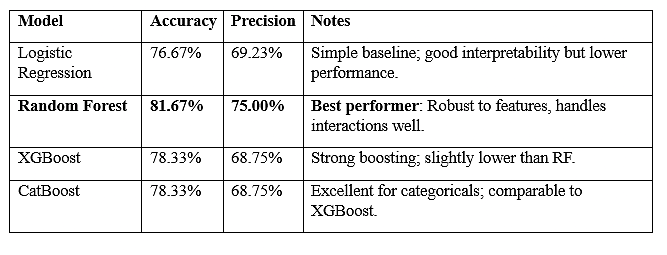

Random Forest achieved the highest scores, validating its use for final interpretation.

## **Feature Importance**
The Random Forest model (best performer) was used to rank features via Gini importance. Notably, engineered ratios ranked highly, indicating the feature engineering step captured valuable interactions.
**Top Features (from visualization)**:

1. **time (~0.22 importance)**: It emerged as the strongest predictor, likely because shorter follow-up times are a proxy for early mortality—patients who die soon after admission have low 'time' values, while survivors are observed longer. Clinically, this reflects survival bias in observational data but underscores the importance of time-to-event analysis in heart failure prognosis. In the model, it helps distinguish high-risk cases early, making it a "protective" factor (longer time correlates with survival). Recommendation: In practice, integrate this with survival models (e.g., Cox regression) for time-dependent predictions.

2. **EF_SC (Ejection Fraction / Serum Creatinine)**: This engineered ratio measures heart pumping efficiency (ejection fraction, EF) relative to kidney function (serum creatinine, SC). A low ratio indicates poor cardiac output compounded by renal impairment—a deadly combination in heart failure, as it can lead to cardiorenal syndrome (mutual worsening of heart and kidney function). This feature ranked highly because it captures a key pathophysiological interaction: heart failure often exacerbates kidney issues via reduced perfusion, and vice versa. Clinically, values below certain thresholds (e.g., EF <40% with SC >1.5 mg/dL) signal high mortality risk. Its prominence validates feature engineering, as the ratio outperformed individual EF or SC features
.
3. **A_EF (Age / Ejection Fraction)**: This ratio adjusts age for heart function, essentially quantifying "age burden" relative to cardiac efficiency. Higher values (older age with lower EF) predict worse outcomes, reflecting how aging exacerbates heart failure through mechanisms like fibrosis, reduced reserve, and comorbidities. It ranked well because age alone is a broad risk factor, but dividing by EF highlights vulnerability in elderly patients with systolic dysfunction. Clinically, this aligns with guidelines (e.g., ACC/AHA) that stratify heart failure risk by age and EF, aiding in decisions like device implantation or advanced therapies.

4. **SC_SS (Serum Creatinine / Serum Sodium)**:This ratio compares kidney function (SC) to electrolyte balance (serum sodium, SS). Elevated ratios suggest renal impairment with hyponatremia (low sodium), a common and ominous sign in advanced heart failure due to neurohormonal activation (e.g., ADH excess). It contributes significantly because hyponatremia worsens prognosis independently, and combining it with SC captures fluid imbalance and organ stress. Clinically, monitoring this ratio could guide diuretic therapy or vasopressin antagonists to prevent decompensation.

5. **EF_SS (Ejection Fraction / Serum Sodium)**: Similar to SC_SS, this ratio links heart function (EF) to sodium levels. Low ratios indicate poor EF with electrolyte disturbances, amplifying risks like arrhythmias or fluid overload. Its ranking highlights how sodium imbalances interact with cardiac output, a factor in acute decompensated heart failure. Clinically, this supports routine electrolyte checks in low-EF patients, potentially informing treatments like sodium restriction or tolvaptan..

**Mid-tier**: P_SC (Platelets / Serum Creatinine), CP_SC (CPK / Serum Creatinine), A_SC (Age / Serum Creatinine).
Binary features (e.g., anaemia_0, smoking_0) ranked lowest, suggesting limited independent predictive power.
Code for visualization:
Python

## **Conclusion**
In summary, this machine learning project on the Heart Failure Clinical Records Dataset successfully identified robust predictors of mortality, achieving a best-in-class performance with the Random Forest model (81.67% accuracy and 75.00% precision on the test set). By incorporating feature engineering—specifically, ratio-based interactions like EF_SC and A_EF—the model not only outperformed simpler baselines (e.g., Logistic Regression at 76.67% accuracy) but also uncovered clinically meaningful patterns that raw features might overlook. The top-ranked features, such as follow-up time, heart-kidney ratios (EF_SC), and age-adjusted cardiac metrics (A_EF), align seamlessly with established cardiology literature, reinforcing the cardiorenal syndrome as a pivotal axis in heart failure progression.

The results highlight the value of ensemble methods like Random Forest in handling small, imbalanced datasets with mixed feature types, while emphasizing precision to minimize false positives in a clinical context (where over-predicting mortality could lead to unnecessary interventions). Feature importance analysis further validates the project's approach, showing that engineered ratios capture synergistic effects (e.g., how renal dysfunction amplifies cardiac risks), leading to more nuanced predictions. This convergence with studies like Chicco & Jurman (2020)—which similarly prioritized serum creatinine and ejection fraction—builds confidence in the findings' generalizability.

Ultimately, the project bridges data science and medicine, demonstrating how Python-based workflows (using libraries like Scikit-learn and Pandas) can translate raw clinical data into actionable insights. While the dataset's small size (299 records) limits broader extrapolation, the high performance and interpretable results suggest strong potential for real-world applications in prognostic tools.

## **Recommendations**
Based on the elaborated feature importance and overall results, here are expanded recommendations spanning clinical, technical, and research dimensions:

### **Clinical Recommendations:**

1. **Prioritize Multi-Organ Monitoring**: Focus on top features like EF_SC and SC_SS in routine assessments. For instance, calculate these ratios during patient visits to flag high-risk cases early—e.g., an EF_SC below 20–25 (empirical threshold from data) could trigger renal consults or intensified diuretic management. This supports guidelines from the American College of Cardiology (ACC) and European Society of Cardiology (ESC), which emphasize integrated cardiorenal care.

2. **Age-Stratified Interventions**: Given A_EF's prominence, tailor treatments by age and EF (e.g., beta-blockers or ACE inhibitors for older patients with low EF). Use these ratios in electronic health records (EHRs) for automated risk scoring.

3. **Follow-Up Optimization**: Leverage 'time' as a predictor by implementing dynamic monitoring protocols—shorter initial follow-ups for high-risk profiles (e.g., low EF_SC) to catch decompensation early.

4. **De-emphasize Binary Factors**: Since anaemia, diabetes, and smoking ranked low, treat them as secondary modifiers rather than primary drivers, focusing resources on modifiable biomarkers like sodium and creatinine.

### **Technical Recommendations:**

1. **Enhance Model Deployment**: Integrate the Random Forest pipeline into a web app (e.g., via Streamlit or Flask) for clinicians to input patient data and receive mortality risk scores with feature explanations. Include confidence intervals for predictions to aid decision-making.

2. **Address Limitations**: The small dataset risks overfitting; validate on larger cohorts (e.g., from MIMIC-III or UK Biobank). Incorporate SMOTE or undersampling for better imbalance handling in future iterations.

3. **Advanced Interpretability**: Use SHAP (SHapley Additive exPlanations) to dissect individual predictions, e.g., how EF_SC influences a specific patient's risk. This could reveal personalized insights beyond global importance.

### **Research and Future Work**:

1. **Hyperparameter Tuning and Ensembling**: Apply GridSearchCV to optimize Random Forest parameters (e.g., n_estimators, max_depth) and stack models (RF + XGBoost) for potential 2–5% gains in precision.

2. **Incorporate Survival Analysis**: Extend to time-to-event models (e.g., Kaplan-Meier or Cox PH) using 'time' as a censoring variable, addressing the dataset's survival nature.

3. **External Validation and Expansion**: Test on diverse datasets (e.g., including ethnicity or genetic factors) to assess generalizability. Explore deep learning (e.g., TabNet) for automatic feature interactions.

4. **Ethical Considerations**: Ensure bias checks (e.g., for sex/age subgroups) and collaborate with clinicians for real-world pilots, adhering to HIPAA/GDPR for data privacy.



By implementing these, the project can evolve from an analytical tool to a practical aid in reducing heart failure mortality, potentially saving lives through data-driven precision medicine.

## **References:**

* **Dataset**: Heart Failure Clinical Data on Kaggle
* **Libraries**: Pandas, Scikit-learn, XGBoost, LightGBM, CatBoost, RandomForest, Logistics regression, seabons, Matplotlib.pyplot.
* **Original Research**: Chicco, D., Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making.